This is my firts attempt to unsupervised learning.

I am trying to cluster young people on their Hobbies/Interests.

Any suggestions/improvements are most welcome!!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)  
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['columns.csv', 'responses.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
responses=pd.read_csv("../input/responses.csv")
columns=pd.read_csv("../input/columns.csv")

In [4]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


Finding similar behaviours/clusters ,given hobbies and interests

In [5]:
#creating a hobbies dataframe
hobbies=responses.iloc[:,31:63,]


In [6]:
hobbies.head()
hobbies.dtypes

History                   float64
Psychology                float64
Politics                  float64
Mathematics               float64
Physics                   float64
Internet                  float64
PC                        float64
Economy Management        float64
Biology                   float64
Chemistry                 float64
Reading                   float64
Geography                 float64
Foreign languages         float64
Medicine                  float64
Law                       float64
Cars                      float64
Art exhibitions           float64
Religion                  float64
Countryside, outdoors     float64
Dancing                   float64
Musical instruments       float64
Writing                   float64
Passive sport             float64
Active sport              float64
Gardening                 float64
Celebrities               float64
Shopping                  float64
Science and technology    float64
Theatre                   float64
Fun with frien

In [7]:
print("hobbies:",hobbies.shape)


hobbies: (1010, 32)


In [8]:
#finding missing values in dataset
#hobbies.isnull().any()
#Checking if any null values in the columns
hobbies.loc[hobbies.isnull().any(axis=1)]

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
22,3.0,4.0,2.0,1.0,1.0,NaN,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,1.0,4.0,4.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,5.0,2.0,5.0
27,2.0,2.0,3.0,1.0,3.0,4.0,2.0,2.0,5.0,5.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,5.0,2.0,1.0,4.0,2.0,5.0
46,4.0,3.0,1.0,2.0,2.0,NaN,4.0,2.0,2.0,1.0,5.0,4.0,5.0,2.0,1.0,5.0,5.0,4.0,5.0,3.0,4.0,1.0,3.0,5.0,1.0,4.0,5.0,NaN,3.0,5.0,5.0,4.0
63,4.0,2.0,3.0,NaN,2.0,4.0,3.0,4.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,5.0,5.0,1.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0
69,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,5.0,5.0,NaN,1.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,NaN,NaN,5.0,1.0,4.0
78,2.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,5.0,1.0,5.0,NaN,2.0,3.0,1.0,5.0,5.0,1.0,2.0,5.0,5.0,5.0,5.0,3.0
83,NaN,2.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,3.0,2.0,2.0,4.0,5.0,5.0,4.0,3.0,1.0,5.0,3.0,1.0,1.0,NaN,1.0,3.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0
84,5.0,5.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,NaN,3.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0,4.0,5.0,5.0,3.0,5.0
87,5.0,4.0,5.0,NaN,1.0,5.0,2.0,4.0,3.0,2.0,3.0,4.0,5.0,1.0,4.0,1.0,2.0,2.0,3.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,3.0,4.0,5.0,5.0,3.0
91,1.0,1.0,1.0,1.0,1.0,NaN,5.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,3.0,1.0,3.0,3.0,1.0,3.0,5.0,4.0,1.0


In [9]:
#dropping all the Nan values
hobbies.dropna(inplace=True)

In [10]:
hobbies.loc[hobbies.isnull().any(axis=1)]

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets


In [11]:
hobbies.shape


(886, 32)

In [12]:
hobbies.describe()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,3.206546,3.117381,2.610609,2.370203,2.082393,4.176072,3.129797,2.647856,2.648984,2.147856,3.162528,3.104966,3.787810,2.509029,2.253950,2.658014,2.594808,2.261851,3.674944,2.437923,2.318284,1.886005,3.411964,3.275395,1.893905,2.345372,3.262980,3.250564,3.025959,4.554176,2.926637,3.326185
std,1.268124,1.252249,1.305642,1.343986,1.230950,0.913510,1.317451,1.342117,1.377722,1.358643,1.491443,1.271699,1.131025,1.363540,1.242315,1.421139,1.317220,1.320525,1.203753,1.434083,1.514616,1.285946,1.400013,1.506597,1.146859,1.271289,1.284293,1.278406,1.324435,0.735615,1.409504,1.544347
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,5.000000,3.000000,4.000000,3.000000,5.000000,5.000000,2.750000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Fun with Friends and Internet have higher means. There might be some outliers in there/ People love Internet and socialising more.

So will scale the data to get better clusters

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe241e98278>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe241e98908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe241e98128>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe241e98f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe241eab320>,
 'means': []}

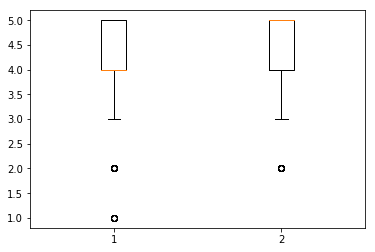

In [13]:
# Finding outliers in Internet and FunWith Friends

#sns.boxplot(x=hobbies['Internet'])
plt.boxplot([hobbies['Internet'],hobbies['Fun with friends']])

In [14]:
from scipy import stats
import numpy as np
outliers=[]

z_score=np.abs(stats.zscore(hobbies))
z_score
#print(np.where(z_score > 3))

array([[1.74099139, 1.50423935, 1.23427344, ..., 0.60639836, 0.76194854,
        0.43655691],
       [1.74099139, 0.0937895 , 1.06474465, ..., 0.75377619, 0.65779154,
        1.0844454 ],
       [1.74099139, 0.89280393, 1.23427344, ..., 0.60639836, 1.47181858,
        1.0844454 ],
       ...,
       [0.95197944, 0.0937895 , 0.29840528, ..., 2.11395075, 1.36766158,
        1.0844454 ],
       [0.16296748, 1.50423935, 0.29840528, ..., 0.60639836, 1.36766158,
        0.43655691],
       [0.95197944, 0.0937895 , 1.23427344, ..., 0.60639836, 0.65779154,
        1.0844454 ]])

In [15]:
zscore_df= pd.DataFrame(hobbies.iloc[[3,8,38,97, 105, 132, 169, 180, 220, 260, 275, 291, 327,
       373, 408, 416, 517, 519, 557, 656, 672, 675, 687, 699, 760, 804,848],:])

In [16]:
# Finding out people  who are not Interested in Internet at all
zscore_df[zscore_df['Internet']==1]

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
8,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,1.0,5.0,4.0,1.0,1.0
290,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,1.0,5.0,5.0,3.0,3.0,1.0,5.0,3.0,4.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0
426,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0,1.0,1.0
593,2.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,5.0,4.0,3.0,3.0,5.0,1.0,2.0,2.0,1.0,5.0,3.0,3.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,3.0,5.0,3.0,5.0
595,4.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,3.0,4.0,5.0,1.0,2.0,1.0,5.0,5.0,1.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0
747,5.0,4.0,2.0,1.0,2.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,3.0,2.0,1.0,2.0,5.0,5.0,5.0,3.0,5.0,5.0,2.0,4.0,5.0,2.0,4.0,3.0,5.0,4.0,4.0,1.0
767,3.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
966,5.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,5.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0


Assuming young people who are interested in PC are also interested in Internet so assuming person with index'747' as an outlier and removing the same from dataset

In [17]:
hobbies.drop(index=747, inplace=True)

In [18]:
hobbies.shape

(885, 32)

In [19]:
#Finding people with no interest in Socialising
zscore_df[zscore_df['Fun with friends']==2]

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
40,2.0,1.0,1.0,2.0,1.0,5.0,4.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,2.0
108,1.0,3.0,2.0,3.0,2.0,4.0,4.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,4.0,4.0,1.0,1.0,1.0,4.0,2.0,3.0,2.0,1.0,3.0
117,2.0,2.0,2.0,5.0,2.0,5.0,5.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,3.0,3.0,2.0,2.0,1.0,5.0
147,4.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,2.0,3.0,5.0,5.0,4.0,2.0,2.0,2.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,3.0
187,5.0,3.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0
200,3.0,2.0,3.0,1.0,3.0,5.0,5.0,3.0,1.0,1.0,3.0,4.0,4.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0,5.0
243,4.0,5.0,2.0,4.0,1.0,4.0,3.0,2.0,5.0,3.0,5.0,2.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,2.0,5.0,3.0,2.0,1.0,1.0
307,2.0,2.0,2.0,5.0,3.0,5.0,5.0,1.0,5.0,4.0,5.0,2.0,5.0,5.0,1.0,1.0,2.0,2.0,5.0,1.0,5.0,5.0,5.0,4.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0,1.0
327,3.0,3.0,1.0,2.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,1.0,4.0,1.0,1.0,3.0,4.0,2.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,5.0


Well , for the above can't say whether these are outliers or just some people don't like socialising. So keeping these in the data. 
Let's see how these affect the grouping.

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
hobbies_scaled=ss.fit_transform(hobbies)
hobbies_scaled= pd.DataFrame(hobbies_scaled)
hobbies_scaled.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.740381,1.504609,-1.234258,0.467727,0.745373,0.904211,-0.097799,1.752671,0.257132,0.627084,-0.107674,-0.080958,1.071269,0.359677,-1.011089,-1.167344,-1.210960,-0.955551,1.102771,0.392419,0.452896,0.091688,-1.724947,1.145396,2.722730,-1.058625,0.574628,0.586018,-0.773928,0.605399,0.762629,0.435167
1,-1.740381,-0.092966,1.063747,1.956714,-0.067010,-0.198030,0.661430,1.752671,-1.196937,-0.844983,0.563394,0.706381,1.071269,-1.107209,-0.205676,-0.463598,-0.450350,-0.955551,-2.222450,-1.002322,-0.869919,-0.688542,-1.724947,-1.509942,-0.779619,-0.271989,-0.204156,-0.196223,-0.773928,-0.754444,-0.656775,1.083523
2,-1.740381,-0.891754,-1.234258,1.956714,-0.067010,-0.198030,-0.857028,1.006943,-1.196937,-0.844983,1.234462,-0.868297,1.071269,-0.373766,0.599737,-1.167344,1.831481,2.080940,1.102771,1.787159,1.775710,2.432377,1.133814,-0.846108,-0.779619,-1.058625,0.574628,-0.978464,1.494040,0.605399,1.472331,1.083523
3,0.628000,0.705822,1.829748,1.212220,-0.879393,-1.300271,-1.616257,-0.484512,0.257132,0.627084,1.234462,0.706381,0.186872,-0.373766,2.210564,-1.167344,1.831481,1.321818,-2.222450,-1.002322,-0.869919,0.871918,-1.724947,-1.509942,-0.779619,-0.271989,0.574628,-0.196223,-1.529918,-3.474131,-1.366477,-1.509899
4,-0.161460,-0.891754,0.297745,-0.276766,-0.067010,-2.402512,-0.857028,-0.484512,0.257132,0.627084,1.234462,-0.868297,-0.697524,0.359677,-0.205676,0.240148,-1.210960,1.321818,0.271466,-1.002322,0.452896,-0.688542,-0.295567,-1.509942,1.847143,0.514647,-0.204156,-0.196223,-0.773928,-0.754444,-0.656775,-1.509899
5,1.417460,-0.092966,1.063747,-0.276766,0.745373,-0.198030,0.661430,-1.230240,0.984166,1.363117,-0.107674,-0.080958,0.186872,1.093120,0.599737,1.647641,-0.450350,-0.196428,1.102771,-1.002322,1.775710,-0.688542,1.133814,0.481561,0.095968,-1.058625,-0.982940,-0.196223,-1.529918,-2.114287,0.052927,-0.861543
6,-0.161460,-0.092966,-1.234258,-1.021260,-0.879393,-2.402512,-1.616257,0.261215,1.711201,2.099151,-0.107674,-0.080958,0.186872,1.826564,0.599737,0.943895,-1.210960,-0.955551,0.271466,0.392419,-0.208511,-0.688542,1.133814,-0.182273,0.971556,-1.058625,-0.204156,0.586018,-0.017939,0.605399,-1.366477,1.083523
7,1.417460,-0.891754,0.297745,-1.021260,-0.879393,0.904211,0.661430,-1.230240,-0.469902,-0.108950,-0.778742,-0.080958,0.186872,-1.107209,-0.205676,-1.167344,-1.210960,-0.196428,-1.391145,-1.002322,-0.869919,-0.688542,0.419123,1.145396,-0.779619,0.514647,-0.204156,-0.978464,-0.773928,-0.754444,-0.656775,1.083523
8,-0.161460,-0.891754,-1.234258,-1.021260,-0.879393,-3.504753,-1.616257,-1.230240,0.257132,-0.844983,1.234462,-1.655636,-2.466316,-1.107209,-1.011089,-1.167344,-1.210960,-0.196428,0.271466,-1.002322,-0.208511,-0.688542,0.419123,-1.509942,-0.779619,2.087918,-0.982940,-1.760706,1.494040,-0.754444,-1.366477,-1.509899
9,-0.161460,-0.891754,0.297745,0.467727,-0.879393,0.904211,-1.616257,1.006943,-0.469902,-0.844983,0.563394,0.706381,1.071269,-1.107209,-1.011089,-1.167344,1.070870,1.321818,0.271466,1.787159,0.452896,-0.688542,0.419123,0.481561,-0.779619,-0.271989,0.574628,-0.196223,1.494040,0.605399,-0.656775,-0.861543


Finding out the correlation between dfferent interests

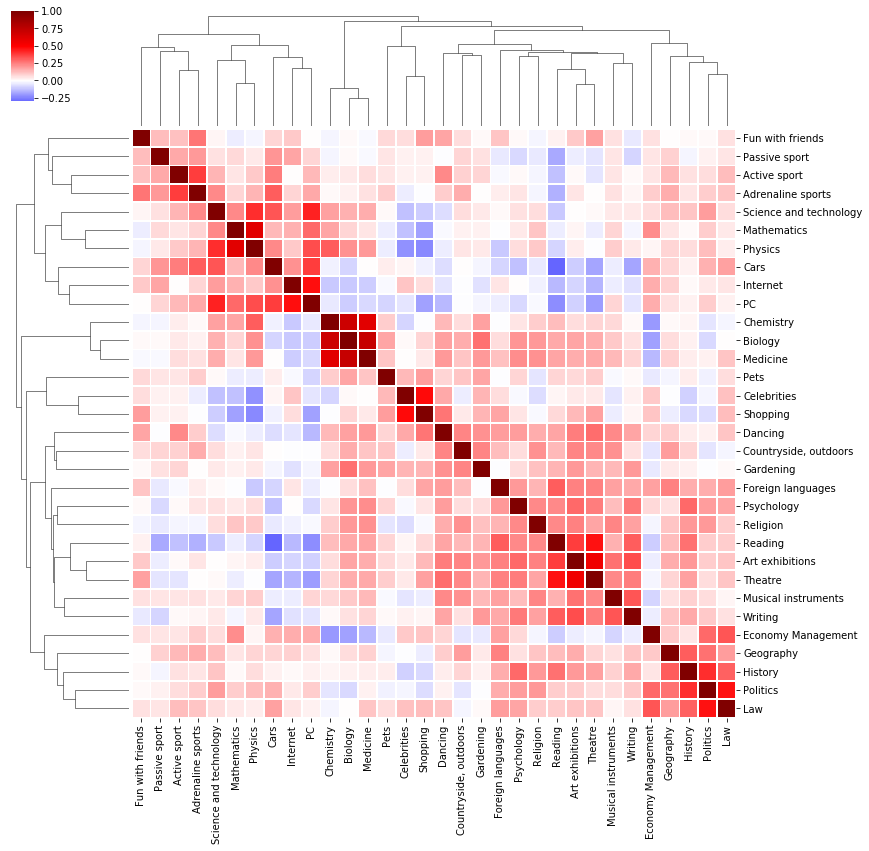

In [21]:
#  clustermap plot using Seaborn


sns.clustermap(hobbies.corr(), center=0, cmap="seismic",
                             linewidths=.75, figsize=(13, 13))

From the above clustermap,
Medicine, Biology, Chemistry have the highest correlations
Mathematics, Physics, Science and Technology


we can assume that data can be grouped into 6, 7, 8 or may be 9 clusters.
Lets see  how many clusters we get using elbow method.

In [22]:
#df= hobbies.T
df=hobbies

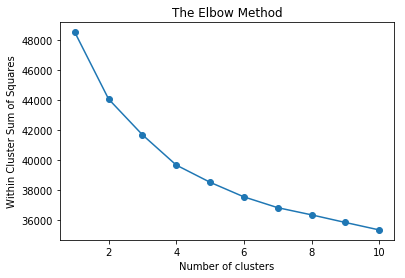

In [23]:
# Using the elbow method to find  the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,11),wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

From the above graph , K=6 shows a substantial decrease in wcss. So choosing 6 as no.of clusters.

Lets do silhoutte analysis to find the no. of clusters in Kmeans clustering

In [24]:
# create a Series for dataframe index and values
hobbies_series=pd.Series(df.index )

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def silhouette_analysis(df, cluster_labels,n,clustering_type,heading):
    
    plt.figure(figsize=(15,10))
    ax= plt.subplot()
    ax.set_ylim([0, len(df) + (n + 1) * 50])
    dictofhobbies={i:cluster_labels[i] for i in range(0,len(cluster_labels))}
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    if clustering_type == 'Kmeans':
        metrics='euclidean'
    if clustering_type == 'Agglomerative':
        metrics='euclidean'
    if clustering_type == 'GaussianMixture':
        metrics='mahalanobis'
    silhouette_avg = silhouette_score(df, cluster_labels,metric=metrics)
    
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
   
    yticks=[]
    ylabels=[]
    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        silhouette_labels=[hobby for hobby,cluster_label in dictofhobbies.items() if cluster_label==i ]
        zipped_values=dict(zip(silhouette_labels,ith_cluster_silhouette_values))      
        #sorted(zipped_values,key=lambda x:x1])
        new_zipped_values=sorted(zipped_values.items(), key=lambda x: x[1])
        ith_cluster_silhouette_values.sort()
        #print("ith_cluster_silhouette_values::",len(ith_cluster_silhouette_values))
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        #print("yupper is::",y_upper)
        color = cm.nipy_spectral(float(i) / n)
        pos=np.arange(y_lower, y_upper)
       
        ax.barh(pos,ith_cluster_silhouette_values,height=1.0,color=color, edgecolor="none")
               
        yticks.extend(pos)
        ylabels.extend(labels[0] for labels in new_zipped_values)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
       
        # Compute the new y_lower for next plot
        y_lower = y_upper + 50  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Clusters")
    
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    hobbies_labels=[]
    for y in ylabels:
        hobbies_labels.append(hobbies_series[y])
    
    #ax.set_yticks(yticks)
    #ax.set_yticklabels(hobbies_labels, fontSize=8)  
    ax.set_xticks([-0.1, 0,0.1, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for " ,heading, "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')

plt.show()


Silhouette analysis using Kmeans, Agglomerative, Gaussian Mixture model clustering

For n_clusters = 6 The average silhouette_score is : 0.06260530692531403
For n_clusters = 7 The average silhouette_score is : 0.062961627913119
For n_clusters = 8 The average silhouette_score is : 0.05647812480527273
For n_clusters = 9 The average silhouette_score is : 0.05643161789880524


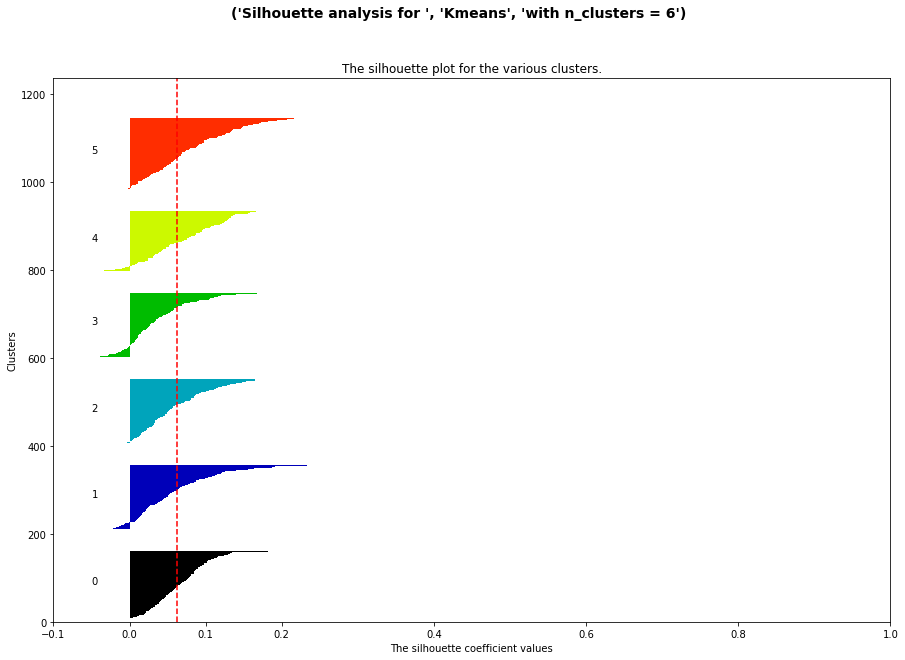

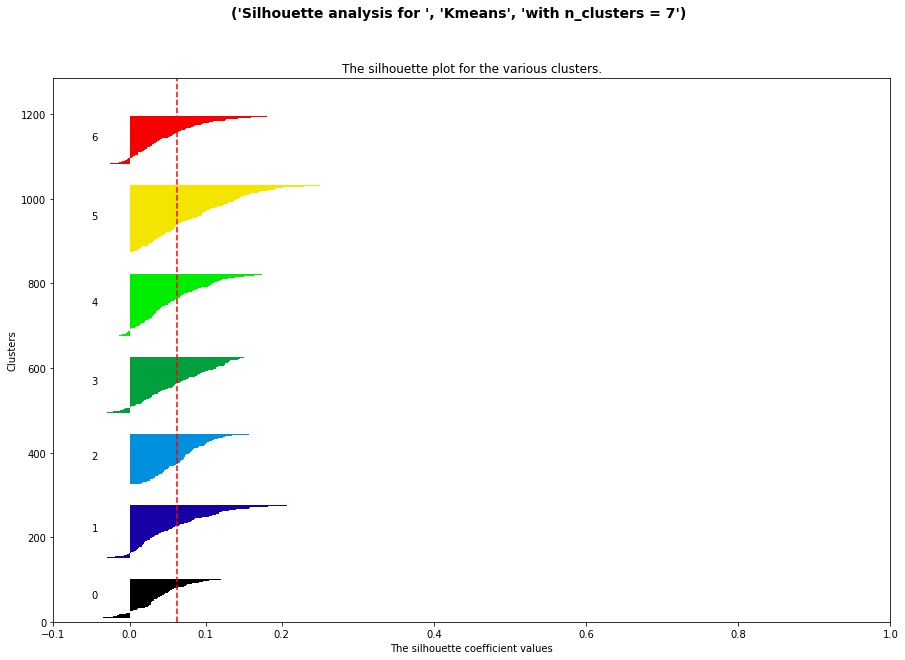

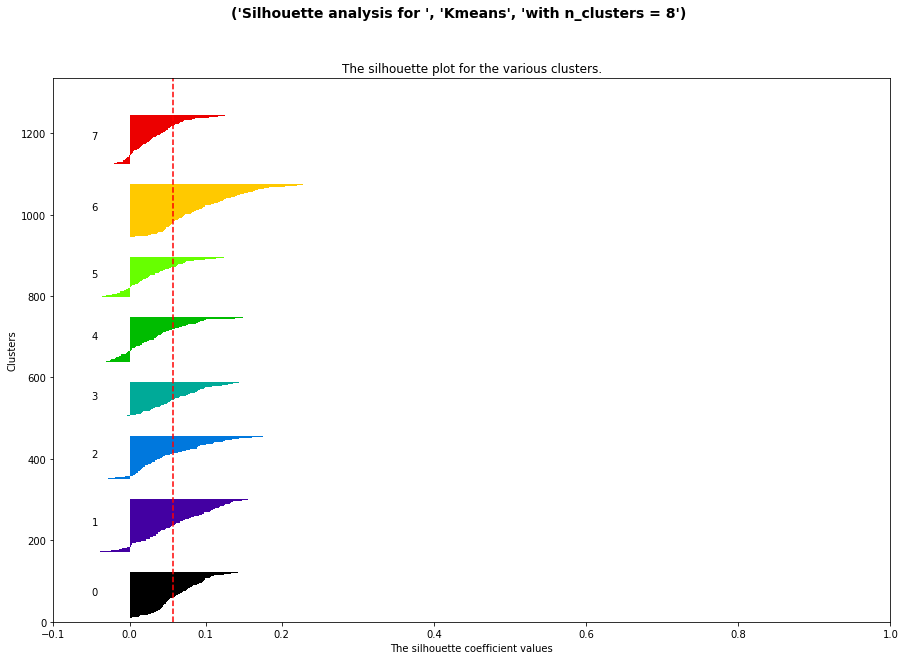

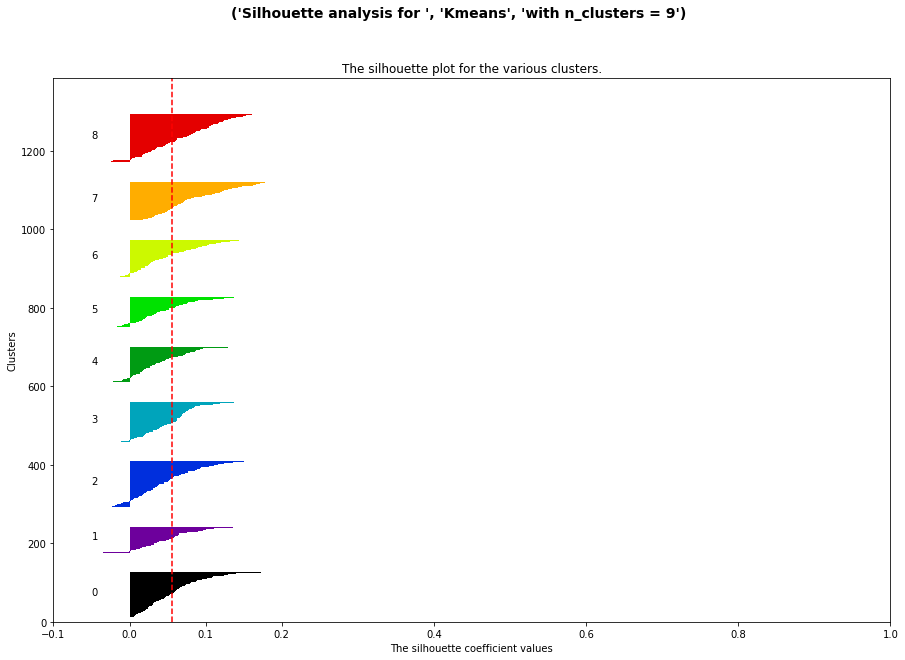

In [26]:
from sklearn.cluster import KMeans

range_of_clusters=[6,7,8,9]
for n in range_of_clusters:
    kmeans_sil=KMeans(n_clusters=n,max_iter=300,n_init=10,random_state=10)
    cluster_labels=kmeans_sil.fit_predict(df)

    silhouette_analysis(df,cluster_labels,n,'Kmeans','Kmeans')

6 or 7 clusters

For n_clusters = 6 The average silhouette_score is : 0.033555606774345284
For n_clusters = 7 The average silhouette_score is : 0.033090878925147865
For n_clusters = 8 The average silhouette_score is : 0.025848307089401956
For n_clusters = 9 The average silhouette_score is : 0.024324695344621557


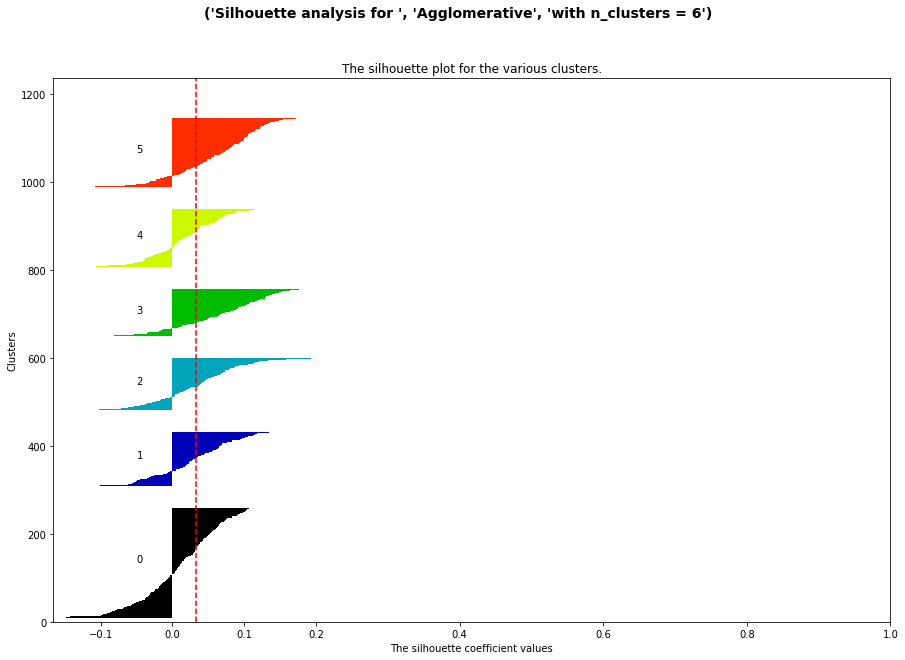

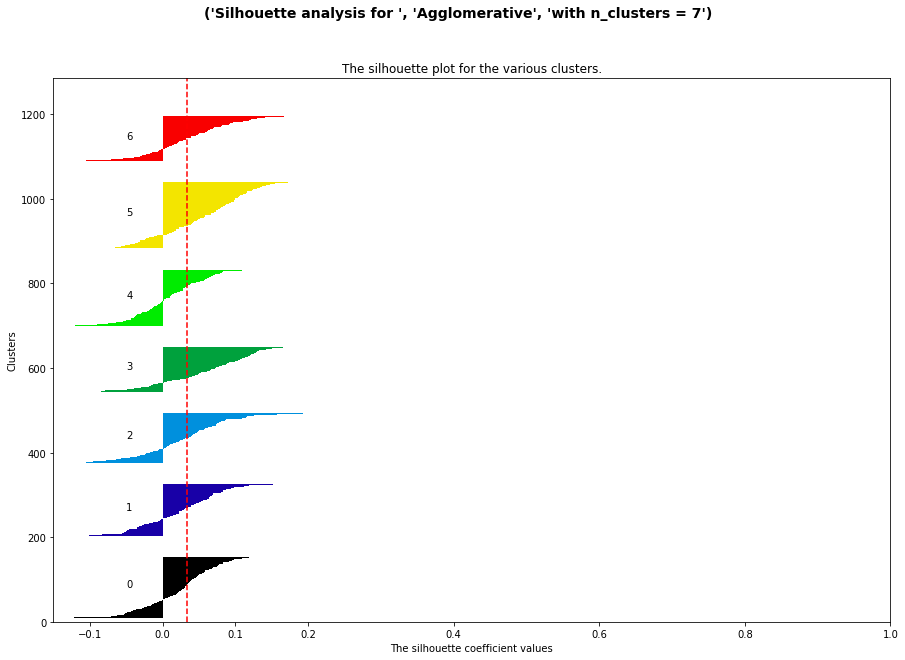

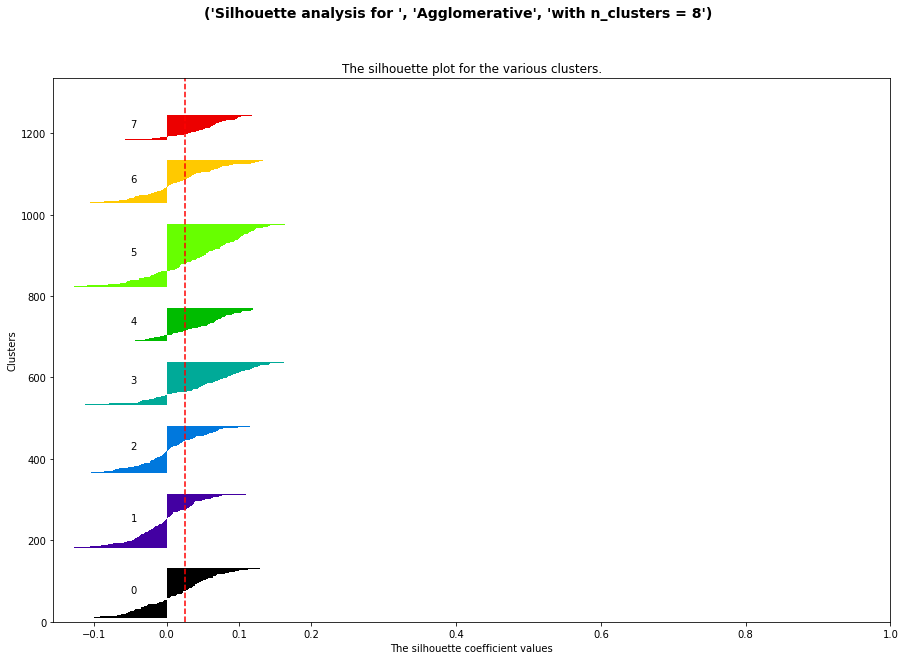

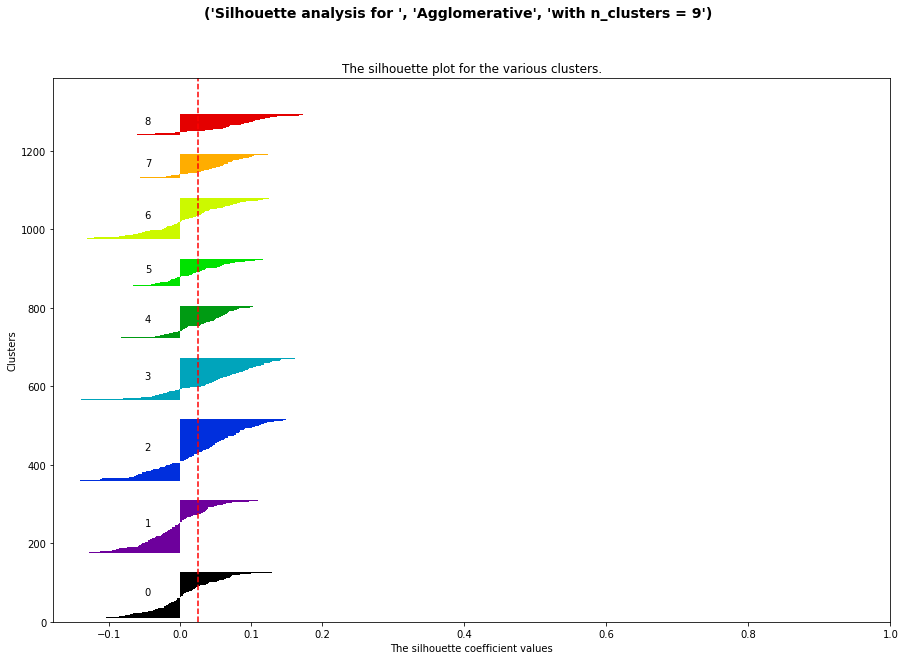

In [27]:
#using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

range_of_clusters=[6,7,8,9]
for n in range_of_clusters:
    ag_c= AgglomerativeClustering(n_clusters=n)
    ag_cluster_labels=ag_c.fit_predict(df)
    silhouette_analysis(df,ag_cluster_labels,n,'Agglomerative','Agglomerative')

For n_clusters = 6 The average silhouette_score is : 0.012522405323801677
For n_clusters = 7 The average silhouette_score is : 0.012226730661228733
For n_clusters = 8 The average silhouette_score is : 0.010661866333215067
For n_clusters = 9 The average silhouette_score is : 0.01395967513749476


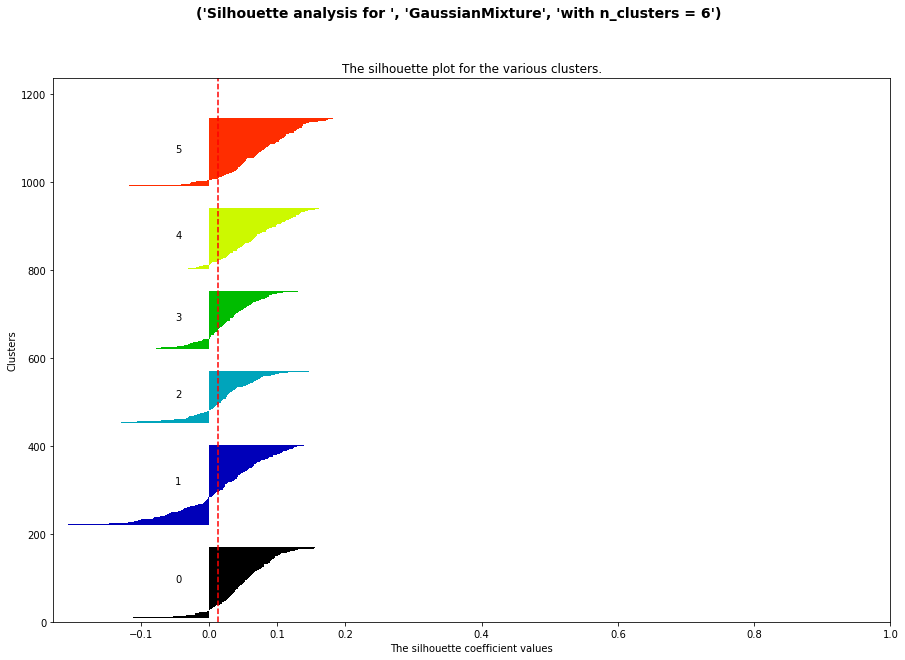

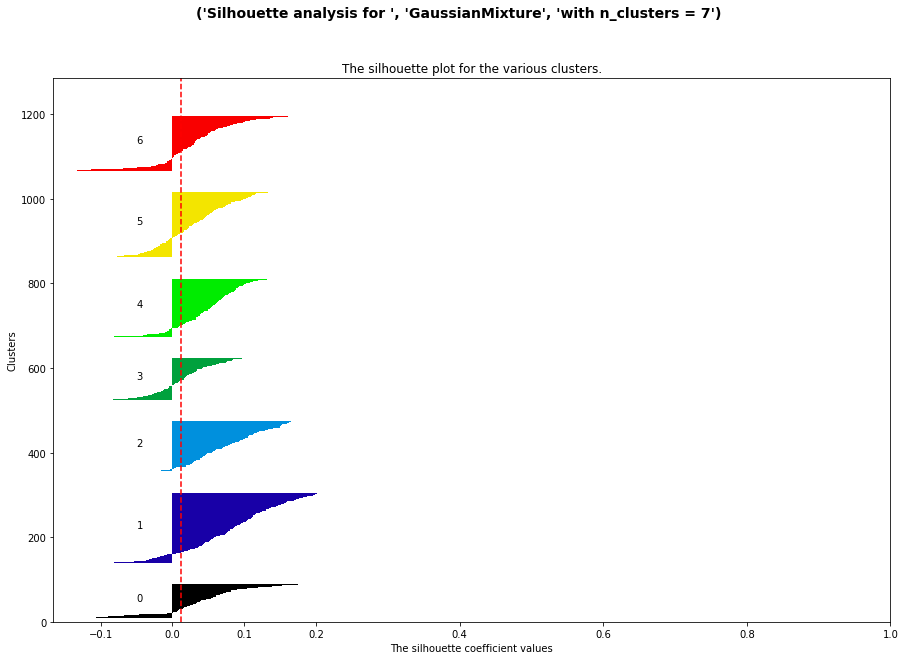

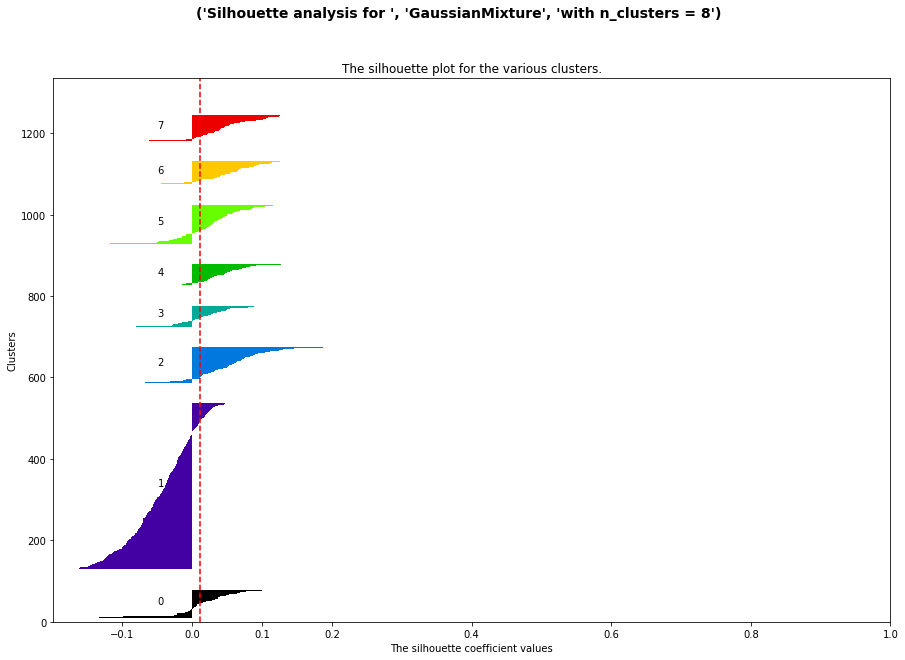

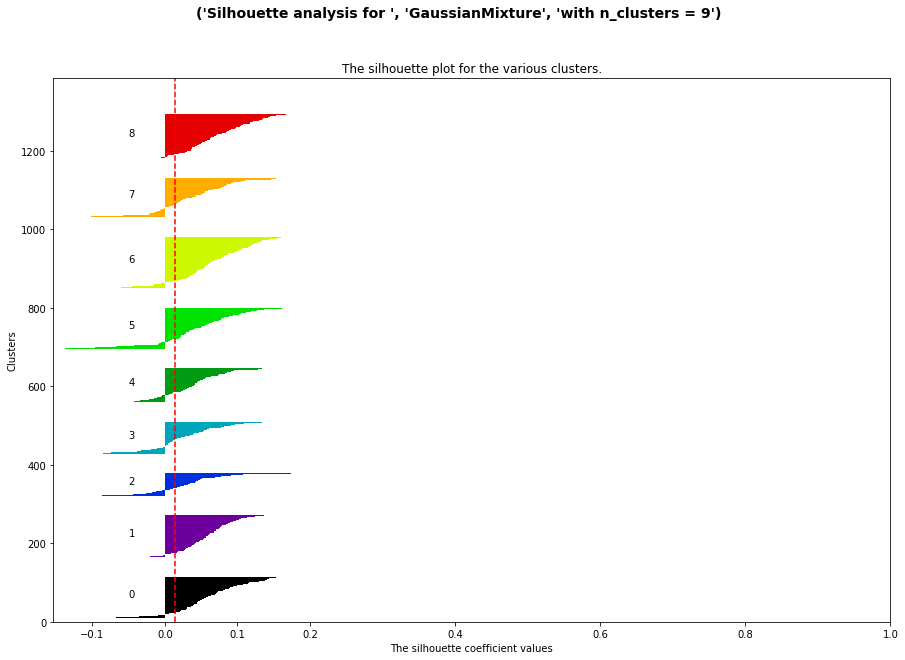

In [28]:
#also trying the gaussian mixture models

from sklearn.mixture import GaussianMixture
range_of_clusters=[6,7,8,9]
for n in range_of_clusters:
    gmm= GaussianMixture(n_components=n)
    gmm_cluster_labels=gmm.fit_predict(df)
    silhouette_analysis(df,gmm_cluster_labels,n, 'GaussianMixture','GaussianMixture')

Kmeans gives us the better silhouette avaerage score using 6 or 7 clusters. 
Let's do PCA on the scaled data to find the minimum no. of components needed to best describe the data

for components = 2
[0.2322]
for components = 3
[0.3127]
for components = 4
[0.3797]
for components = 5
[0.4295]
for components = 6
[0.4734]
for components = 7
[0.509]
for components = 8
[0.544]
for components = 9
[0.578]
for components = 10
[0.6096]
for components = 11
[0.6384]
for components = 12
[0.6657]
for components = 13
[0.6929]
for components = 14
[0.7179]
for components = 15
[0.7418]
for components = 16
[0.7649]
for components = 17
[0.7867]
for components = 18
[0.8068]
for components = 19
[0.8263]


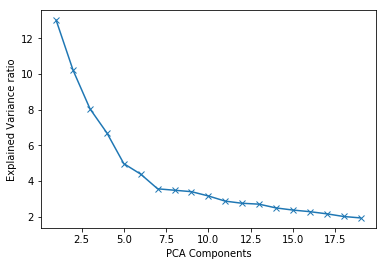

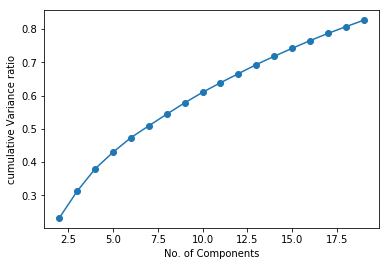

In [29]:
#Running PCA on the scaled data


from sklearn.decomposition import PCA
plt.figure()
cmr=[]
for n_com in range(2,20):
    
    cumulative_ratio=0
   
    pca= PCA(n_components=n_com)
    hobbies_reduced=pca.fit_transform(hobbies_scaled)

    print("for components = %d" %n_com)
    components= pd.DataFrame(np.round(pca.components_, 4),columns=df.keys())
   
    ratios=pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    
    for i in range((variance_ratios.shape[0])):
        
        cumulative_ratio= cumulative_ratio + variance_ratios.values[i]
    
    cmr.append(cumulative_ratio)
    print(cumulative_ratio)
vr= variance_ratios.values
plt.plot(range(1,20),vr*100,marker="x")   
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance ratio")
plt.figure()
plt.plot(range(2,20),cmr,marker="o")
plt.xlabel("No. of Components")
plt.ylabel("cumulative Variance ratio")
plt.show()

15 components gives us almost 75% of variance so taking 15 components with 6 clusters.

Running Kmeans(as it gives the best silhouette score than agglomerative and GMM) on reduced data

PCA for components=15
For n_clusters = 6 The average silhouette_score is : 0.08748811807957908


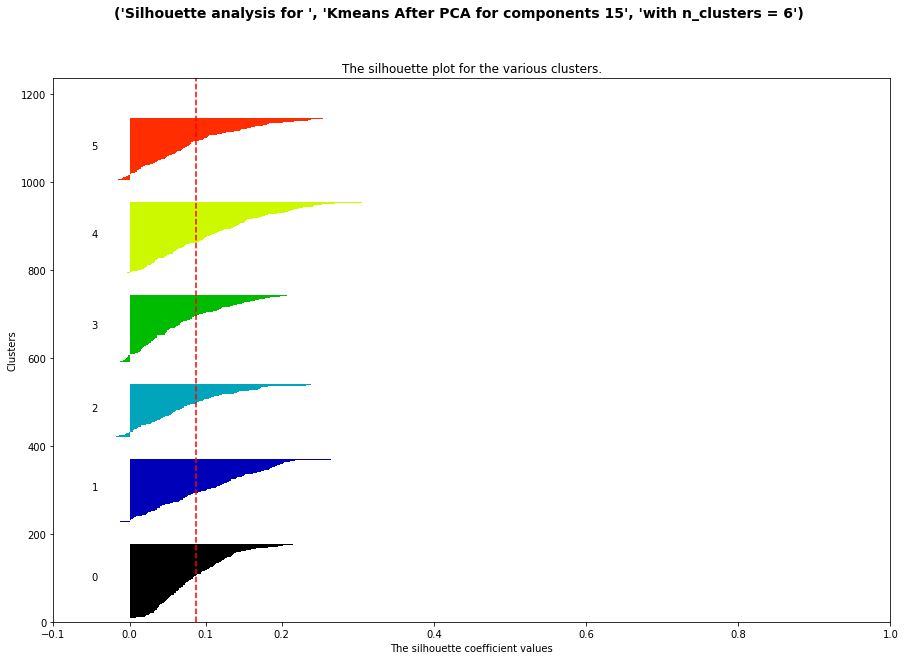

In [30]:
#running PCA with kmeans 
for n_comp in [15]:
    print("PCA for components=%d"%n_comp)
    pca_km=PCA(n_components=n_comp)
    df_reduced=pca_km.fit_transform(hobbies_scaled)
    
    
    for n_clust in [6]:
        kmeans_red_pca=KMeans(n_clusters=n_clust)
        reduced_cluster_labels=kmeans_red_pca.fit_predict(df_reduced)
        centers_km=kmeans_red_pca.cluster_centers_
        silhouette_analysis(df_reduced,reduced_cluster_labels,n_clust,'Kmeans','Kmeans After PCA for components %d' %n_comp)
        
    


6 Clusters have above average silhouette score and the distribution is also uniform.

In [31]:
#visualizing the 6 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(hobbies_scaled)

# running Kmeans for 6 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=6)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['Cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp], axis=1)

In [32]:
to_plot.shape

(885, 3)

In [33]:

def visualize_clusters(to_plot,centers,n_clusters):
    
    plt.figure(figsize=(15,8))
    ax=plt.subplot()

    colors=['red','green','blue','orange','yellow','purple']
    for n_clusters in range(n_clusters):
        
        #colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
        
        ax.scatter(to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 1],to_plot[to_plot['Cluster_pred']==n_clusters].iloc[:, 2],
                   marker='.', s=80, lw=0, alpha=0.7,
                    c=colors[n_clusters], edgecolor='black', label='Cluster %d'%n_clusters)

            
            # Draw white circles at cluster centers
        

        for i, c in enumerate(centers):
           
            ax.scatter(c[0], c[1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
            ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=80, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")

    plt.legend()    
    plt.show()

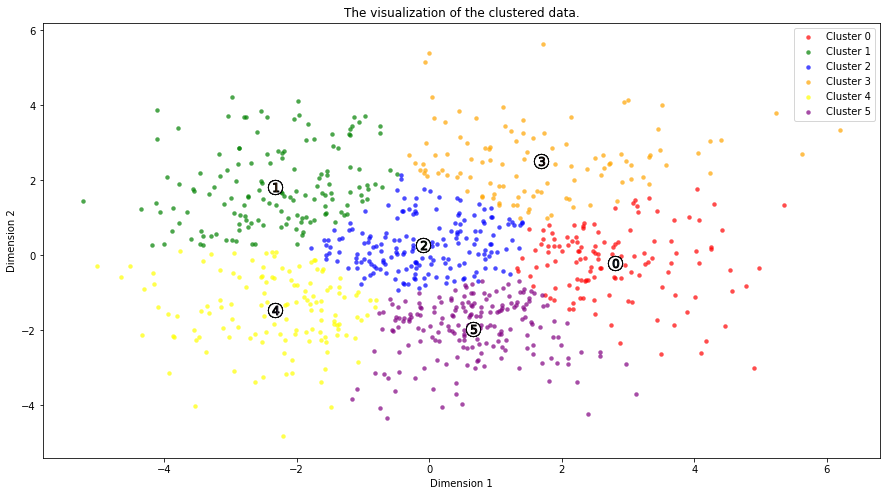

In [34]:
# visualize clusters
visualize_clusters(to_plot,centers_2comp,6)

Some of the data fall  on the boundaries of other clusters.We see some outliers as well.

In [35]:
# Lets recover the data reduced by PCA (also Standard scalar for scaled data)

#finding out the real centers of the data
#main_centers=ss.inverse_transform(pca_2comp.inverse_transform(centers_2comp))
real_centers= ss.inverse_transform(pca_km.inverse_transform(centers_km))


In [36]:
real_centers_df=pd.DataFrame(np.round(real_centers,3), columns = df.columns)

In [37]:
#Deviation from the median(as mean is sensitive to outliers)

dev_from_median=real_centers_df- hobbies.median()

In [38]:
dev_from_median

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,0.499,0.265,1.064,-0.192,-0.692,0.208,-0.357,1.410,0.191,-0.457,0.329,0.487,0.252,0.166,1.004,0.682,0.659,-0.109,-0.496,0.839,-0.254,0.732,-0.453,0.575,0.747,1.094,1.088,-0.204,0.217,-0.218,0.138,-0.368
1,-0.243,0.066,-0.032,0.413,0.509,-0.098,-0.250,-0.260,2.674,2.155,0.328,-0.112,-0.339,2.365,-0.119,0.403,0.444,0.340,-0.334,0.691,0.257,0.637,-0.711,0.220,1.297,0.353,0.430,0.488,0.001,-0.480,-0.270,-0.274
2,0.471,0.666,0.181,-0.223,-0.430,-0.317,-0.703,-0.171,0.494,-0.210,1.431,-0.023,0.060,0.272,-0.325,-0.528,1.732,0.732,0.202,0.783,1.156,1.831,-1.109,-0.258,1.025,-0.037,0.150,-0.347,1.214,-0.416,-0.456,-0.717
3,-0.503,-0.582,0.025,-0.005,-0.592,0.067,-0.211,0.517,-0.229,-0.581,-0.348,-0.581,-0.658,-0.412,-0.339,0.058,-0.269,-0.161,-0.807,-0.284,-0.123,0.455,-0.808,-0.618,0.564,0.342,0.022,-0.621,-0.787,-0.792,-1.096,-1.072
4,-0.049,-0.466,0.620,0.983,0.769,0.665,1.318,0.908,-0.110,-0.285,-1.182,0.036,-0.788,-0.200,0.047,1.824,-0.243,-0.327,-0.633,-0.419,-0.211,0.211,-0.196,0.783,0.367,-0.128,-0.431,1.053,-0.936,-0.422,0.627,-1.063
5,1.137,0.946,1.717,1.226,0.969,0.420,0.819,1.211,1.091,0.440,0.789,0.791,0.277,1.063,1.119,1.233,1.580,1.336,0.306,1.167,1.412,1.731,-0.376,0.822,1.488,0.315,0.254,1.104,0.777,-0.353,0.514,-0.512


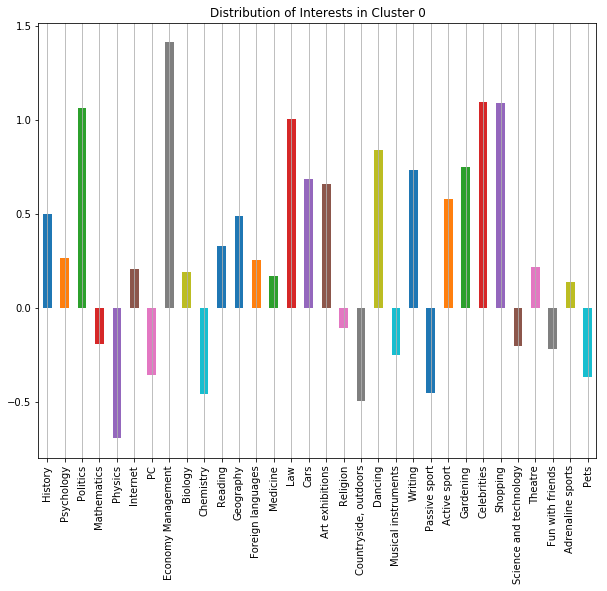

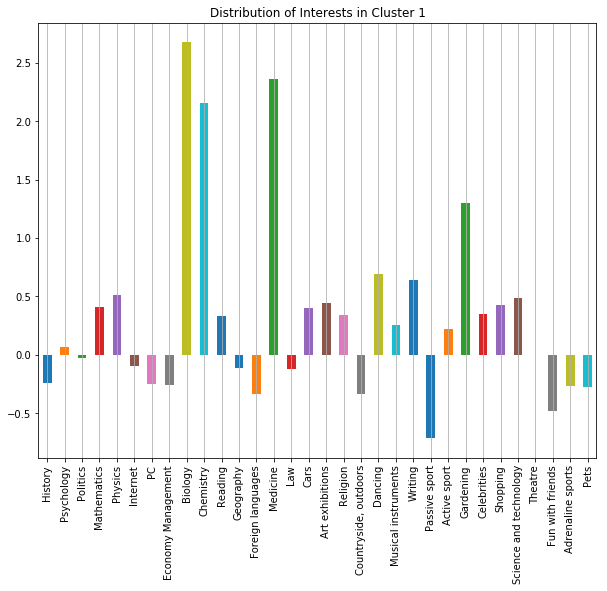

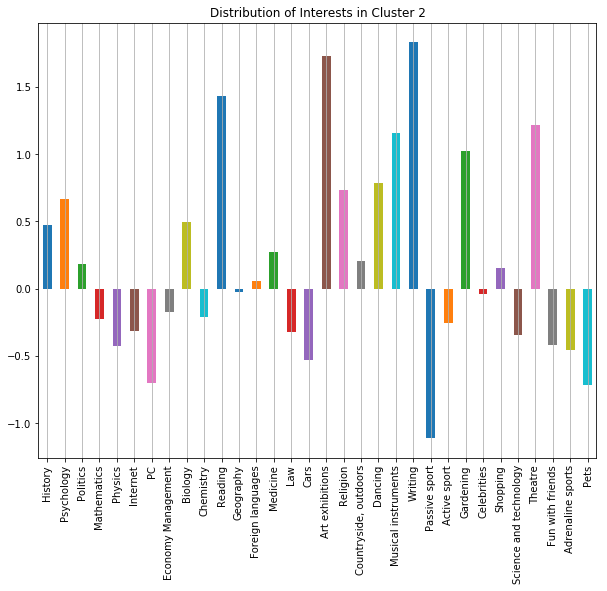

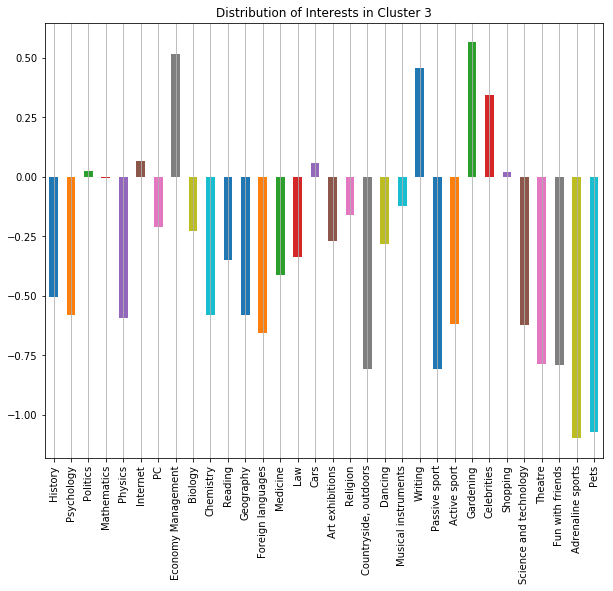

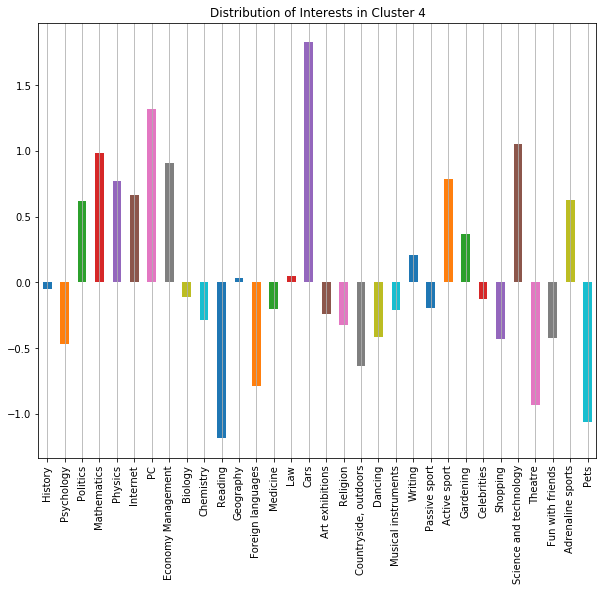

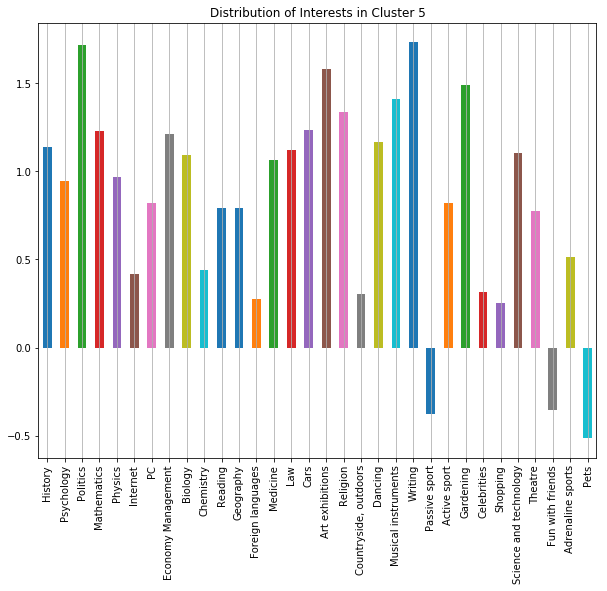

In [39]:
#Plotting the distributions in clusters
for i in range(len(dev_from_median.index)):
    plt.figure(figsize=(10,8))
  
    dev_from_median.iloc[i,:].plot(kind='bar')
    plt.title("Distribution of Interests in Cluster %d"%i)
    plt.grid(axis='x')
    #plt.axhline(y=3.5,color="red", linestyle="--")
    
    plt.show()
   

We see from above that Clusters 1, 2, 4 have better grouping whereas clusters 0, 3, 5 are somewhat mixed up.



**Cluster 1: Medicine, Biology, Chemistry, Gardening**

**Cluster 2: People who have Interests in Reading, Art Exhibitions, Writing,Theatre,Musical instruments** 

**Cluster 4:Mathematics, Physcics, PC ,Cars, Science and technology, Internet**

Cluster 0: Politics, Economy management, History , Law,Mathematics, Religion,Psychology,  etc

